# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
# %tb

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [23]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")
import pandas as pd

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [5]:
from extractors.LocationData import LocationData
sceneData = LocationData.load("../data/location-2/lab", "2022-12-07-fps-5-scene-10.dll")
pedDf = sceneData.getPedDataInSceneCoordinates()
otherDf = sceneData.getOtherDataInSceneCoordinates()
sceneMeta = sceneData.getMeta()

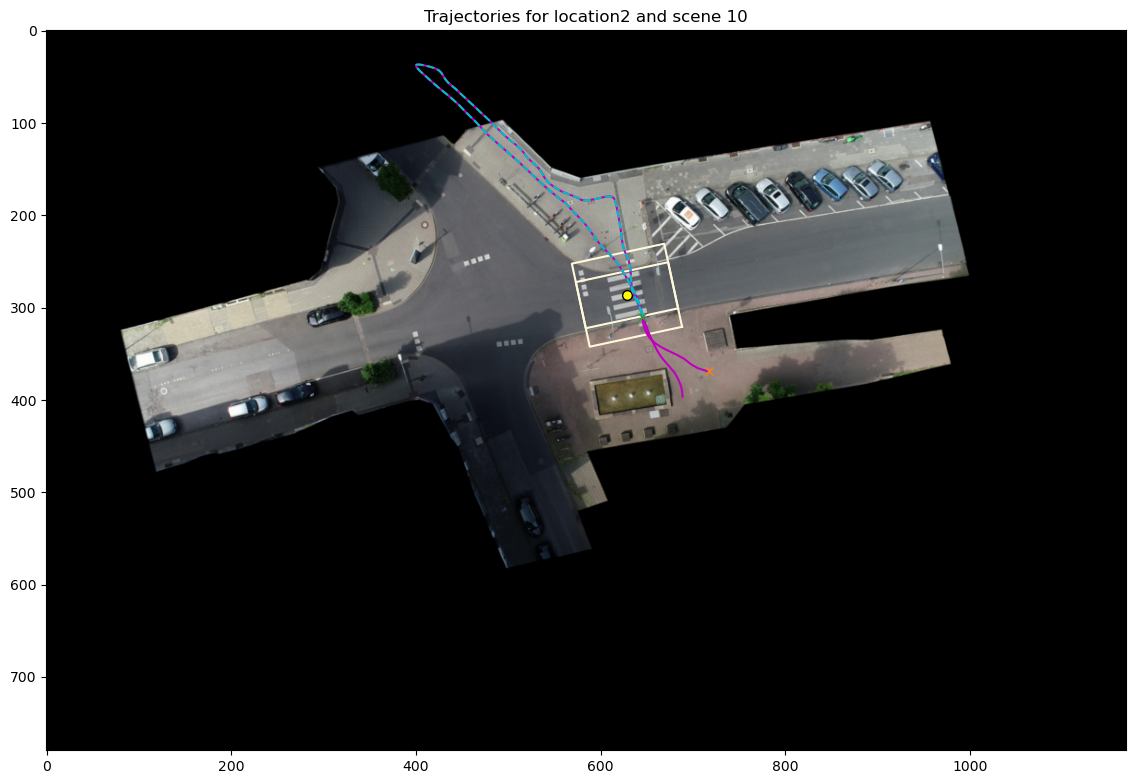

In [6]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[26167])

In [7]:
ped26167 = pedDf[pedDf["uniqueTrackId"]==26167]

In [9]:
ped26167.to_csv("../data/location-2/problemTracks/ped26167.csv")

In [11]:
# visualize all peds
from math import ceil
allPedIds = sceneData.uniquePedIds()
# limit = 50
# nPedIds = len(allPedIds)
# nPages = ceil(nPedIds / limit)
# for page in range(nPages):
#     offset = page * limit
#     visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, offset=offset, limit=limit)

In [12]:
problemId = allPedIds[411]
problemTrack = pedDf[pedDf["uniqueTrackId"] == problemId]
problemId

26167

In [13]:
print(TrajectoryUtils.length(problemTrack, xCol="sceneX", yCol="sceneY"))

75.64104831812152


In [14]:
print(allPedIds)

<IntegerArray>
[18023, 18042, 18053, 18069, 18090, 18107, 18112, 18121, 18127, 18134,
 ...
 29530, 29531, 29532, 29533, 29534, 29542, 29554, 29559, 29575, 29579]
Length: 628, dtype: Int64


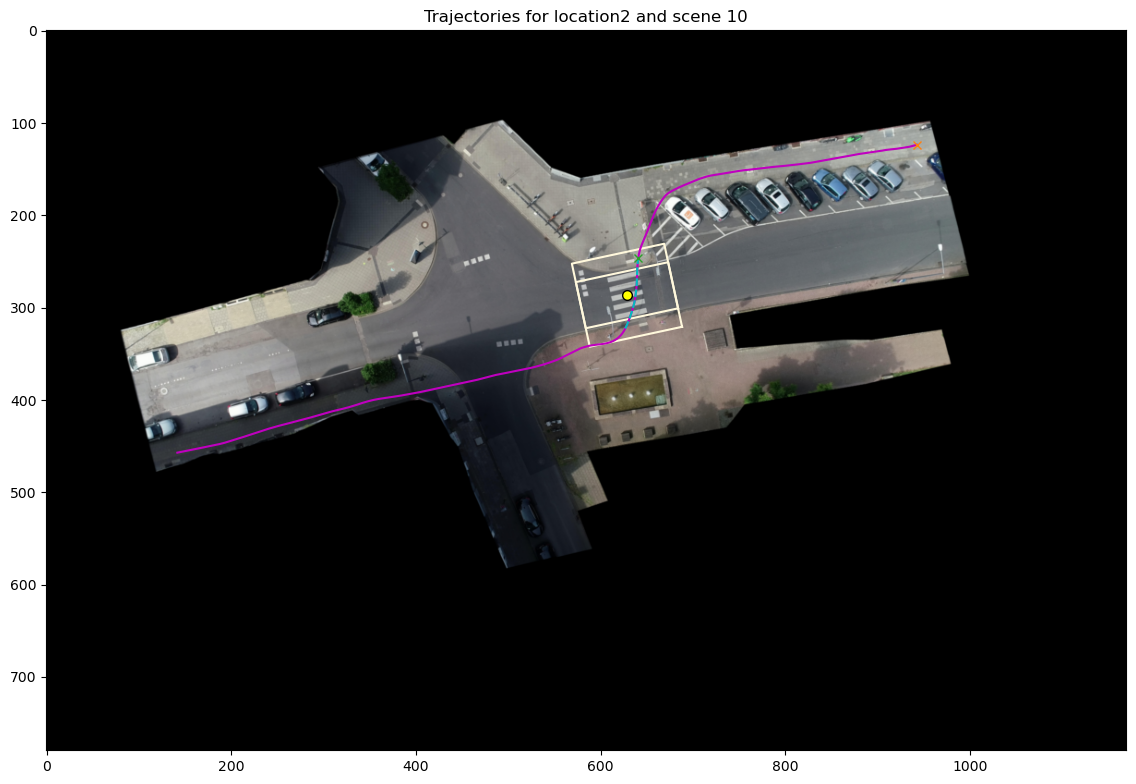

In [70]:
# trackDf = pedDf[pedDf["uniqueTrackId"] == 18042]
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[18388])

In [16]:
xCol = "sceneX"
yCol = "sceneY"
firstRow = trackDf.iloc[0]
originX = firstRow[xCol]
originY = firstRow[yCol]
print(originX, originY)

0.8566639966932772 -2.2974784921233757


In [17]:
trackDf.head(5)

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
23,215,18,42,1638,275,62.76175,-30.07525,112.73113,0.0,0.0,...,0.10289,18042,10,5.0,0.856664,-2.297478,0.186992,-1.033906,0.244926,0.029274
24,216,18,42,1643,280,62.69207,-29.87586,111.57663,0.0,0.0,...,0.08207,18042,10,5.0,0.830584,-2.087880,0.130400,-1.047992,0.282957,0.070432
25,217,18,42,1648,285,62.62496,-29.66462,110.69692,0.0,0.0,...,0.03145,18042,10,5.0,0.809514,-1.867240,0.105348,-1.103202,0.125259,0.276047
26,218,18,42,1653,290,62.55744,-29.45232,110.07579,0.0,0.0,...,-0.01731,18042,10,5.0,0.788267,-1.645477,0.106235,-1.108815,-0.004433,0.028065
27,219,18,42,1658,295,62.48303,-29.24562,109.6885,0.0,0.0,...,-0.03878,18042,10,5.0,0.759105,-1.427735,0.145813,-1.088707,-0.197893,-0.100541


## Testing splitting long trajectories

In [66]:
trackDf = sceneData.pedData[sceneData.pedData["uniqueTrackId"]==26167]
scenePolygon = TrajectoryUtils.scenePolygon(
    sceneData.sceneConfig, 
    sceneData.sceneConfig["boxWidth"], 
    sceneData.sceneConfig["roadWidth"] + 2
)

brokenTracks = TrajectoryUtils.clipByRectWithSplits(
    trackDf, 
    xCol="xCenter",
    yCol="yCenter",
    frameCol="frame",
    rect=scenePolygon
)

In [67]:
len(brokenTracks)

2

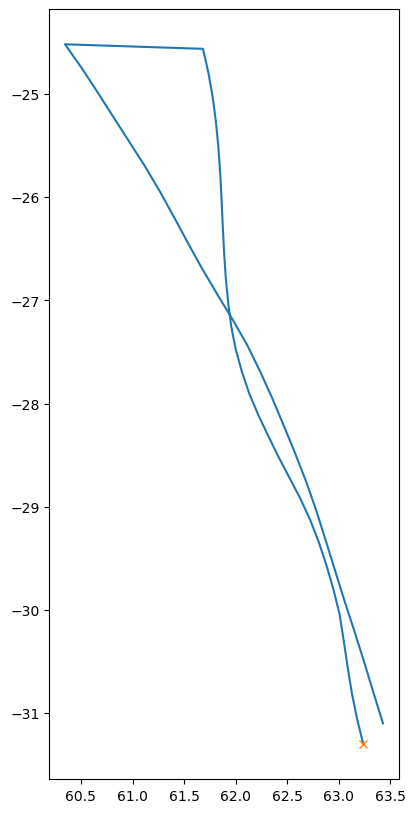

In [68]:
visualizer.showLocalTrajectories(
    pd.concat(brokenTracks), 
    idCol="uniqueTrackId", 
    xCol="xCenter",
    yCol="yCenter"
)

In [48]:
from collections import defaultdict
sceneData.problematicIds = defaultdict(lambda : set([]))
sceneData._clipPed(2)

clipping ped trajectories for scene # 10 with width offset 2: 100%|██████████████████| 628/628 [00:21<00:00, 29.08it/s]


In [44]:

sceneData._clipOther()

clipping other trajectories for scene # 10: 100%|██████████████████████████████████| 1604/1604 [00:53<00:00, 29.96it/s]


In [50]:
sceneData.warnings

['ped 18388: enters the scene 2 times',
 'ped 21102: Disregarding as the length 3.8566445110548906 is too short or rows too less (18)',
 'ped 21215: Disregarding as the length 3.603499308777766 is too short or rows too less (18)',
 'ped 24355: enters the scene 3 times',
 'ped 26167: enters the scene 2 times',
 'ped 26330: enters the scene 4 times',
 'ped 26361: enters the scene 2 times',
 'ped 27159: enters the scene 2 times',
 'ped 18045: enters the scene 4 times',
 'ped 19068: enters the scene 2 times',
 'ped 24163: enters the scene 2 times',
 'ped 26329: enters the scene 2 times',
 'ped 27541: enters the scene 4 times',
 'ped 18308: Disregarding as the length 2.139261015530061 is too short or rows too less (8)',
 'ped 18313: Disregarding as the length 3.213436122844209 is too short or rows too less (12)',
 'ped 19063: Disregarding as the length 3.1432451636683867 is too short or rows too less (6)',
 'ped 19240: Disregarding as the length 0.876950320257651 is too short or rows too le

In [74]:
print(len(sceneData.uniquePedIds()))
print(len(sceneData.uniqueClippedPedIds()))

628
619


In [75]:
sceneData.uniqueClippedPedIds()

{18023,
 18042,
 18053,
 18069,
 18090,
 18107,
 18112,
 18121,
 18127,
 18134,
 18156,
 18162,
 18166,
 18168,
 18180,
 18181,
 18201,
 18204,
 18214,
 18225,
 18248,
 18273,
 18279,
 18280,
 18281,
 18298,
 18304,
 18306,
 18311,
 18313,
 18319,
 18322,
 18337,
 18344,
 18382,
 18388,
 18396,
 18408,
 18420,
 18422,
 19040,
 19045,
 19047,
 19049,
 19055,
 19057,
 19059,
 19060,
 19063,
 19070,
 19071,
 19132,
 19133,
 19140,
 19147,
 19149,
 19150,
 19153,
 19178,
 19180,
 19199,
 19205,
 19212,
 19214,
 19235,
 19242,
 19243,
 19283,
 19289,
 19293,
 19295,
 19320,
 19337,
 19346,
 19349,
 20022,
 20023,
 20043,
 20048,
 20052,
 20054,
 20078,
 20083,
 20086,
 20087,
 20089,
 20098,
 20099,
 20100,
 20121,
 20122,
 20131,
 20136,
 20137,
 20156,
 20189,
 20219,
 20222,
 20224,
 20229,
 20234,
 20252,
 20257,
 20261,
 20263,
 20279,
 20281,
 20287,
 20295,
 20296,
 20312,
 20314,
 20323,
 20327,
 20346,
 20351,
 20357,
 20361,
 20362,
 20369,
 20376,
 20379,
 20383,
 20384,
 20385,
